In [31]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import flows
import synthetic
import train
import util

plt.ion()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


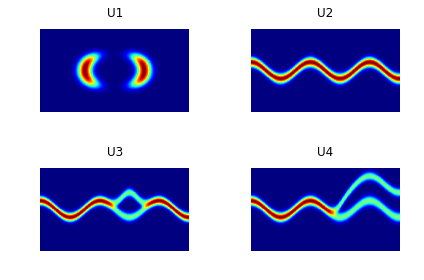

In [48]:
fig, axes = plt.subplots(2, 2)
 
for U, ax in zip(synthetic.U_list(), axes.flatten()):
    util.plot_potential(U, ax)
    ax.set_title(U.__name__)
    ax.axis('off')

fig.tight_layout()
plt.show()
    

In [25]:
def train_model(U, n, K = 32, L = 100, num_epochs = 10, epoch_length = 1000):
    """
    Trains a model to approximate the probability distribution for U.
    n is the number of U (used for model namee)
    """
    z_dim = 2
    model = flows.NormFlow(z_dim)
    model.add_flow(flows.PlanarFlow, K = K)
    sampler = util.get_normal_sampler()
    trainer = train.Trainer_NormFlow(z_dim, model, sampler, save_path = 'normflow_U={}_K={}'.format(n, K))
    trainer.train(U, L = L, num_epochs = num_epochs, epoch_length = epoch_length)
    return model, trainer
    

In [35]:
model1, trainer1 = train_model(synthetic.U1, 1, K = 32, L = 500, num_epochs = 10, epoch_length = 10000)

Epoch 1 Loss: -0.33635385883238633
Epoch 2 Loss: -1.1769416820049285
Epoch 3 Loss: -1.1828150361537932
Epoch 4 Loss: -1.6880979789853097
Epoch 5 Loss: -1.8602131819486618
Epoch 6 Loss: -1.8664521735310555
Epoch 7 Loss: -1.8688506245017051
Epoch 8 Loss: -1.8701611028552054
Epoch 9 Loss: -1.8709485419750214
Epoch 10 Loss: -1.8717072879076004


In [36]:
model2, trainer2 = train_model(synthetic.U2, 2, K = 32, L = 500, num_epochs = 10, epoch_length = 10000)

Epoch 1 Loss: -1.165513758496556
Epoch 2 Loss: -2.3208951899528505
Epoch 3 Loss: -2.641667848920822
Epoch 4 Loss: -2.6999777495622634
Epoch 5 Loss: -2.805226462888718
Epoch 6 Loss: -2.9647049342393874
Epoch 7 Loss: -3.0618916986942293
Epoch 8 Loss: -3.0981162267446516
Epoch 9 Loss: -3.1337641664266584
Epoch 10 Loss: -3.14136224629879


In [37]:
model3, trainer3 = train_model(synthetic.U3, 3, K = 32, L = 500, num_epochs = 10, epoch_length = 10000)

Epoch 1 Loss: -1.488915792750538
Epoch 2 Loss: -2.7252615639686586
Epoch 3 Loss: -2.8808592422962187
Epoch 4 Loss: -2.893611968111992
Epoch 5 Loss: -2.9007880460739135
Epoch 6 Loss: -2.9075399202108385
Epoch 7 Loss: -2.914784109783173
Epoch 8 Loss: -2.92130243639946
Epoch 9 Loss: -2.926803858613968
Epoch 10 Loss: -2.9319826505422593


In [38]:
model4, trainer4 = train_model(synthetic.U4, 4, K = 32, L = 500, num_epochs = 10, epoch_length = 10000)

Epoch 1 Loss: -1.5117725177931831
Epoch 2 Loss: -2.8186124385356903
Epoch 3 Loss: -3.116588966464996
Epoch 4 Loss: -3.2863966953516006
Epoch 5 Loss: -3.348022341489792
Epoch 6 Loss: -3.436764727926254
Epoch 7 Loss: -3.4523341828107834
Epoch 8 Loss: -3.465555640935898
Epoch 9 Loss: -3.5212952855587005
Epoch 10 Loss: -3.639242101120949


In [45]:
trainer1.save_model()
trainer2.save_model()
trainer3.save_model()
trainer4.save_model()

Sampling..........
Sampling..........
Sampling..........
Sampling..........


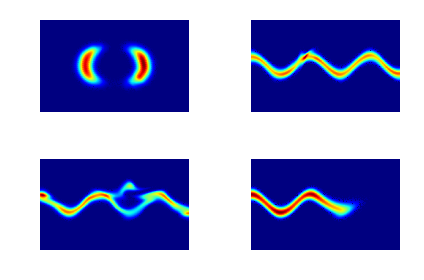

In [51]:
fig, axes = plt.subplots(2, 2)

model_list = [model1, model2, model3, model4]
for model, ax in zip(model_list, axes.flatten()):
    util.plot_model_hist(model, ax)
    ax.axis('off')

fig.tight_layout()
plt.show()
